## DebateStar - A Deep Mining of Persuasive Speeches

### Overview
Inspired by IBM Project Debater, we aim to uncover the myth of persuasive debate with
major focus on text data. Using NLP tools such as sentiment analysis and representation
learning, we can extract features from debate texts and study constituents of persuasive
speeches and similarities among good/bad debaters. Finally, for each user to improve
accordingly, a summary with persuasiveness scores after each sentence will be generated
in real time. Thus, the product offers an alternative for debaters to practice their expertise
with minimal cost and time. If time permits, we will incorporate tone changes in audio
and facial expressions in video to extract features beyond texts that affect the
persuasiveness of debate. As claps and long time silence in the audio can function as real
time supervisions, animated simulations can be generated to track the performance of
speakers on timeline. Our model can thus generate more comprehensive advice of
managing emotional expression in the debate.

### Dataset
We debate transcripts from [Intelligent Square](https://www.intelligencesquaredus.org/). This file performs some basic exploratory analysis using all textual data. Metadata contains general inforamtion about all debates, while each debate is loaded from its own csv.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from nltk import word_tokenize, sent_tokenize, FreqDist

meta = pd.read_csv('metadata.csv', index_col='id', parse_dates=['date'])

### Part 1: Metadata Basic Stats

Number of Debates

In [18]:
print("Total number of debates included: ", len(meta))
print("Year ranges from", min(meta['date']).year, "to", max(meta['date']).year)

Total number of debates included:  175
Year ranges from 2006 to 2019


Debates Distribution Over the Years

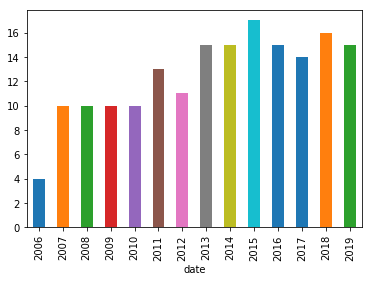

In [30]:
dates = meta['date']
dates.groupby(dates.dt.year).count().plot(kind="bar")

### Part 2: Transcript Data

#### Corpus Construction
Construct the corpus from all text transcripts. Then perform standard NLP exploration.

In [38]:
# Import all debate transcripts
path = r'/Users/maoli/Development/DS/cleaned_transcript_data' # use your path
all_files = glob.glob(path + "/*.csv")
all_debates = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    all_debates.append(df)

In [46]:
all_debates[0][:5]

,Unnamed: 0,Speaker,Script
0,0,Bernard-Henri Levy,One sentence?
1,1,Bernard-Henri Levy,"To believe in words, in values, in truth -- no..."
2,2,Bernard-Henri Levy,We are going to be dealing with emotions.
3,3,Bernard-Henri Levy,I'm sorry?
4,4,Bernard-Henri Levy,"I'll introduce him, of course. The floor is his."


In [66]:
# Construct the corpus
raw = ""
for debate in all_debates:
    for s in debate['Script']:
        raw += s
        raw += " "
tokenized_text = sent_tokenize(raw)
tokenized_word = word_tokenize(raw)
print("The number of characters in entire corpus: ", len(raw))
print("The number of word tokens in the corpus: ", len(tokenized_word))
print("The number of sentence tokens in the corpus: ", len(tokenized_text))

The number of characters in entire corpus:  10454078
The number of word tokens in the corpus:  2187868
The number of sentence tokens in the corpus:  109704


#### Frequency Distribution
Simple word frequency

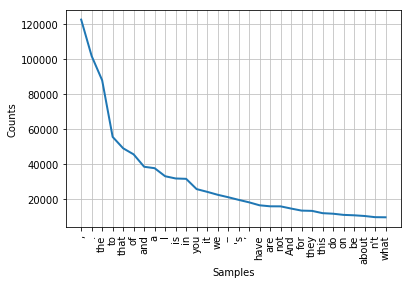

In [67]:
fd = nltk.FreqDist(tokenized_word)
fd.plot(30,cumulative=False)

Word frequence after removing stop words.

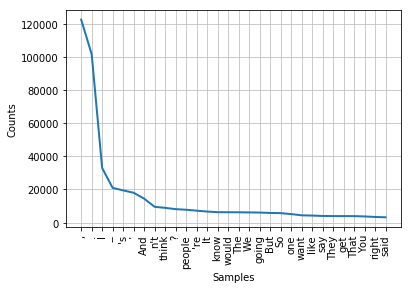

In [77]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
clean_fd = nltk.FreqDist([w for w in tokenized_word if w not in stop_words])
clean_fd.plot(30,cumulative=False)

#### TF-IDF Word Cloud

In [93]:
# Generate a word cloud image
wordcloud = WordCloud(
    stopwords=stop_words, 
    background_color="white",
    max_words=1000    
).generate(raw)

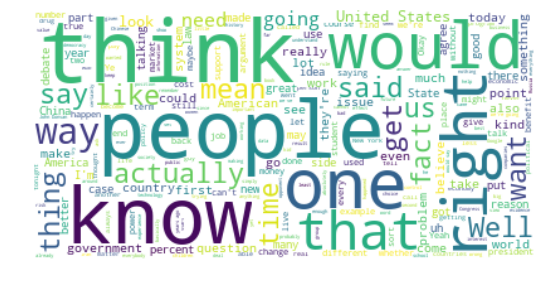

In [94]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[9,16])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()